# Занятие 2
# Прикладная алгебра и численные методы
## Метод наименьших квадратов, линейная регрессия
numpy:
https://numpy.org/doc/stable/reference/routines.linalg.html

scipy:
https://docs.scipy.org/doc/scipy/reference/linalg.html

In [59]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from google.colab import files
from sympy import latex, Matrix
from IPython.display import Latex

## Метод наименьших квадратов
Решим с помощью МНК СЛАУ
## Пример 1
$$
\left\{
\begin{matrix}
x + 3y = 6\\
3x + 9y = 3
\end{matrix}
\right.
$$
Вначале построим графики прямых, соответствующих уравнениям системы:

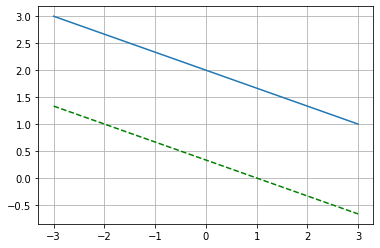

In [2]:
A = np.array([[1, 3], [3, 9]])
b = np.array([[6], [3]])
X = [-3, 3]
Y1, Y2 = [[(b[i] - A[i, 0] * x) / A[i, 1] for x in X] for i in (0, 1)]
plt.plot(X, Y1)
plt.plot(X, Y2, 'g--')
plt.grid(True)

Прямые параллельны, поскольку коэффициенты при переменных пропорциональны, проверим это:

In [3]:
A[0, 0] / A[1, 0] == A[0, 1] / A[1, 1]

True

Найдем псевдорешение с помощью псевдообратной матрицы:

In [4]:
sol = np.linalg.pinv(A) @ b
display(Latex(f'Псевдорешение\ {latex(Matrix(sol))}'))

<IPython.core.display.Latex object>

Отметим на графике точку, соответствующую псевдорешению:

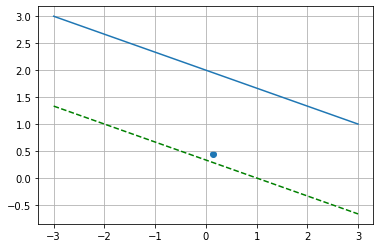

In [5]:
plt.plot(X, Y1)
plt.plot(X, Y2, 'g--')
plt.scatter(*sol)
plt.grid(True)

Сравним длину невязки для псевдорешения и для (0, 1) и (0, 1/3), для этого сначала опишем длину невязки в виде функции (будем находить длину вектора как норму, по умолчанию норма евклидова):

In [6]:
def residual(A, b, sol):
    return np.linalg.norm(A @ sol - b)

Сравним длину невязки для псевдорешения и для (0, 1) и (0, 1/3):

In [7]:
for item in (sol, np.array([[0], [1]]), np.array([[0], [1/3]])):
    display(Latex('решение:\ {},\ \
    невязка\ {}'.format(*map(latex, (item, residual(A, b, item))))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Построим график зависимости невязки от координат $x$ и $y$ вектора в диапазоне (-0.5, 1):

(0.0, 5.0)

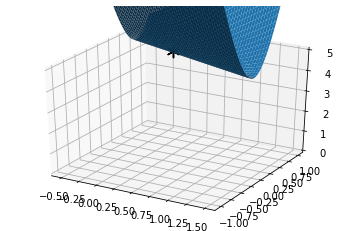

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-0.5, 1.5, 0.01)
xlen = len(X)
Y = np.arange(-1.0, 1.0, 0.01)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.array([[residual(A, b, np.array([[X[i, j]], [Y[i, j]]])) for j in range(xlen)] for i in range(ylen)])
ax.plot_surface(X, Y, Z)
ax.scatter(*sol, residual(A, b, sol), c='k', s=150, marker=(6, 2))
ax.set_zlim(0, 5)

По графику неясно, что в точке, соответствующей псевдорешению, невязка имеет минимум.
Найдем минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне (-0.5, 1):

In [24]:
min_res = min([min(zz) for zz in Z])
min_res, residual(A, b, sol), abs(residual(A, b, sol) - min_res)

(4.743416490252568, 4.743416490252569, 8.881784197001252e-16)

## Линейная регрессия
Даны значения некоторой величины $Q$:
$$
1.325, 0.997, 1.001, 1.126, 0.835, 1.131, 0.916
$$
полученные в моменты времени $t$
$$
1, 2, 3, 5, 6, 7, 9
$$

Найти коэффициенты $k$ и $b$ линейной регрессии $Q = kt+b$.

Составим матрицу $A$, первый столбец которой образуют значения моментов времени, второй столбец - единицы.
Также составим матрицу-столбец $Q$ из значений $Q$,
тогда
$$
\left[\begin{matrix}k\\b\end{matrix}\right] = A^+Q
$$

In [34]:
t_col = np.array([[1, 2, 3, 5, 6, 7, 9]]).T
n, m = t_col.shape
A = np.hstack((t_col, np.ones((n, 1))))
Q = np.array([[1.325, 0.997, 1.001, 1.126, 0.835, 1.131, 0.916]]).T
res = np.linalg.pinv(A) @ Q
k, b = res[:, 0]
display(Latex('t = {}, A = {},\
Q = {}'.format(*map(latex, map(Matrix, (t_col, A, Q))))))
print(f'k = {k}, b = {b}')

<IPython.core.display.Latex object>

k = -0.02908092485549138, b = 1.1843815028901736


Изобразим на графике линию регрессии и точки:

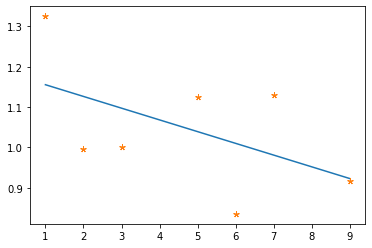

In [35]:
X = np.array([min(t_col), max(t_col)])
Y = k * X + b
plt.plot(X, Y)
plt.plot(t_col, Q, ' ', marker=(5, 2))

## Линейная регрессия, несколько переменных
Даны значения некоторой величины $Q$:
$$
1.325,\ 0.997,\ 1.001,\ 1.126,\ 0.835,\ 1.131,\ 0.916
$$
полученные в моменты времени $t$
$$
1,\ 2,\ 3,\ 5,\ 6,\ 7,\ 9,
$$
при значениях параметра $s$, равных в соответствующий момент времени
$$
3.4,\ 2.2,\ 2.3,\ 2.5,\ 1.6,\ 1.7,\ 0.9.
$$

Найти коэффициенты $k_1$ и $k_2$ линейной регрессии $Q = k_1t+k_2s$.

Составим матрицу $B$, первый столбец которой образуют значения моментов времени, второй столбец - значения параметра $s$.
Также составим матрицу-столбец $Q$ из значений $Q$,
тогда
$$
\left[\begin{matrix}k_1\\k_2\end{matrix}\right] = B^+Q
$$

In [50]:
np.array([[k1, k2]]), B, B @ np.array([[k1, k2]]).T

(array([[0.06070524, 0.3640568 ]]), array([[1. , 3.4],
        [2. , 2.2],
        [3. , 2.3],
        [5. , 2.5],
        [6. , 1.6],
        [7. , 1.7],
        [9. , 0.9]]), array([[1.29849835],
        [0.92233543],
        [1.01944635],
        [1.21366819],
        [0.94672231],
        [1.04383323],
        [0.87399827]]))

In [55]:
t_col = np.array([[1, 2, 3, 5, 6, 7, 9]]).T
s_col = np.array([[3.4, 2.2, 2.3, 2.5, 1.6, 1.7, 0.9]]).T
B = np.hstack((t_col, s_col))
Q = np.array([[1.325, 0.997, 1.001, 1.126, 0.835, 1.131, 0.916]]).T
res = np.linalg.pinv(B) @ Q
k1, k2 = res[:, 0]
regr_tsQ = (B @ np.array([[k1], [k2]])).round(3)
resid = (Q - regr_tsQ).round(3)
display(Latex('t = {},\ s = {},\ B = {},\ \
Q = {},\ k_1 t + k_2 s = {},\ Q - (k_1 t + k_2 s) = {}\
'.format(*map(latex, map(Matrix, (t_col, s_col, B, Q, regr_tsQ, resid))))),
Latex(f'k_1 = {round(k1, 3)}, k_2 = {round(k2, 3)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Украшение графика
Для повышения информативности и для красоты можно на графике:

###  вывести легенду legend

### вывести подписи к осям xlabel, ylabel

### изменить засечки на осях и подписи к ним xticks, yticks

### использовать в легенде формулы Latex

### вывести название title

### вывести линии сетки grid

### соотношение масштабов по осям сделать одинаковым или каким-то определенным

### много еще чего можно, 
читайте документацию:

https://matplotlib.org/

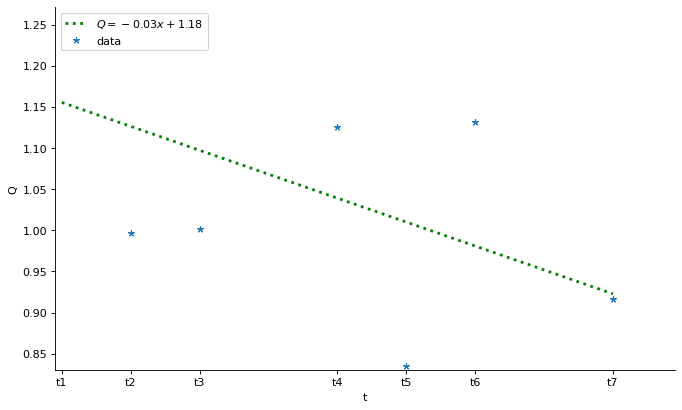

In [79]:
X = np.array([min(t_col), max(t_col)])
Y = k * X + b
#Изменяем цвет, тип и толщину линии, ставим метку для легенды 
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, Y, color="green", linewidth=2.5, linestyle=":",
         label=f'$Q = {k.round(2)}x + {b.round(2)}$')
plt.plot(t_col, Q, ' ', marker=(5, 2), label='data')
#ограничения по осям
plt.xlim(X.min() * 0.9, X.max() * 1.1)
plt.ylim(Y.min() * 0.9, Y.max() * 1.1)
#Подписи к осям
plt.xlabel('t')
plt.ylabel('Q')
#засечки на осях и подписи к засечкам на осях
xtick_names = [f't{i + 1}' for i in range(len(t_col))]
ytick_names = [item.round(1) for item in Q]
plt.xticks(t_col, xtick_names)
#Перенос осей координат:
ax = plt.gca()  # gca = 'get current axis' получаем доступ к текущей системе координат
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0.9 * min(Y)))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0.9 * min(X)))
#Добавляем легенду
plt.legend(loc='upper left')

## Чтение из файла с pandas
Нам понадобится для работы с реальными данными брать данные из файла, а не перенабирать их вручную. 
Данные, которые нам понядобятся для МНК и регрессионного анализа обычно храятся в файле .xlsx или .csv.
Работать с данными, записанными в файлы такого типа, будем с помощью пакета pandas,
в нем нам понадобятся функции
### pandas.read_csv
### pandas.read_excel
pandas.read_csv(filepath_or_buffer, sep=object object, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None)

pandas.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True, storage_options=None)

Подробности смотрите здесь:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [60]:
import pandas as pd

In [61]:
uploaded = files.upload()

for fn in uploaded.keys():

  print(f'Загружен файл "{fn}"')

Saving sem2_corona2020.xlsx to sem2_corona2020.xlsx
Загружен файл "sem2_corona2020.xlsx"


In [72]:
#fn = 'sem2_corona2020.csv'
res = pd.read_csv(fn, delimiter=';',
                  skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
res[:5]

,A,1,2,3,4,5,6
0,Российская Федерация,7444,5644,1800,5008,1530,3478
1,Центральный федеральный округ,4994,3760,1234,3268,1127,2141
2,Белгородская область,26,24,2,14,4,10
3,Брянская область,20,20,0,129,10,119
4,Владимирская область,35,35,0,0,0,0


Можно считать только столбец с названиями областей:

In [73]:
names = pd.read_csv(fn, delimiter=';', usecols=[0], skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
names[:5]

,A
0,Российская Федерация
1,Центральный федеральный округ
2,Белгородская область
3,Брянская область
4,Владимирская область


In [74]:
total = pd.read_csv(fn, delimiter=';',
                    usecols=[1], skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
total[:5]

,1
0,7444
1,4994
2,26
3,20
4,35


Считаем несколько столбцов:

In [75]:
q = pd.read_csv(fn, delimiter=';',
                    usecols=[0, 3], skiprows=[0, 1, 2, 3, 4, 5, 103], encoding='cp1251')  
q[:5]

,A,3
0,Российская Федерация,1800
1,Центральный федеральный округ,1234
2,Белгородская область,2
3,Брянская область,0
4,Владимирская область,0


### Работа с данными, извлеченными из csv
read_csv и read_excel возвращают данные типа pandas.core.frame.DataFrame:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [76]:
type(q)

pandas.core.frame.DataFrame

## Основные средства работы с pandas.core.frame.DataFrame
#### DataFrame.index 
The index (row labels) of the DataFrame.

Метки строк (например, номера строк)
#### DataFrame.columns 
The column labels of the DataFrame.
Метки столбцов (например, названия столбцов, если есть)
#### DataFrame.values 
Return a Numpy representation of the DataFrame.

Возвращает array с данными из DataFrame
#### DataFrame.axes 
Return a list representing the axes of the DataFrame.

Возвращает список list осей DataFrame
#### DataFrame.ndim 
Return an int representing the number of axes / array dimensions.

Возвращает число осей DataFrame, т.е. размерности массива
#### DataFrame.size 
Return an int representing the number of elements in this object.

Возвращает число элементов в объекте
#### DataFrame.shape 
Return a tuple representing the dimensionality of the DataFrame.

Возвращает  tuple, описывающий размерности DataFrame
#### DataFrame.empty 
Indicator whether DataFrame is empty.
Показатель того, пусто ли DataFrame или нет.

In [77]:
qq5 = q[:5]
display(q.index, q.columns, qq5.values, q.axes, q.ndim, qq5.size, q.shape, q.empty)        

RangeIndex(start=0, stop=96, step=1)

Index(['A', '3'], dtype='object')

array([['   Российская Федерация', 1800],
       ['  Центральный федеральный округ', 1234],
       ['Белгородская область', 2],
       ['Брянская область', 0],
       ['Владимирская область', 0]], dtype=object)

[RangeIndex(start=0, stop=96, step=1), Index(['A', '3'], dtype='object')]

2

10

(96, 2)

False

## Немного о read_excel
Считаем данные из файла sem2_corona2020.xlsx, выделим строки с 5 до 10 (не включая 10) и выведем на экран некоторые характеристики полученных DataFrame.

In [62]:
uploaded = files.upload()

for fn1 in uploaded.keys():

  print(f'Загружен файл "{fn1}"')

Saving sem2_corona2020.xlsx to sem2_corona2020 (1).xlsx
Загружен файл "sem2_corona2020.xlsx"


In [67]:
rexcel = pd.read_excel(fn1, header=0, index_col=0, skiprows=range(6)) 

In [68]:
rexcel[:10]

,1,2,3,4,5,6
A,,,,,,
Российская Федерация,7444.0,5644.0,1800.0,5008.0,1530.0,3478.0
Центральный федеральный округ,4994.0,3760.0,1234.0,3268.0,1127.0,2141.0
Белгородская область,26.0,24.0,2.0,14.0,4.0,10.0
Брянская область,20.0,20.0,0.0,129.0,10.0,119.0
Владимирская область,35.0,35.0,0.0,0.0,0.0,0.0
Воронежская область,9.0,9.0,0.0,18.0,6.0,12.0
Ивановская область,46.0,41.0,5.0,6.0,1.0,5.0
Калужская область,28.0,21.0,7.0,27.0,6.0,21.0
Костромская область,10.0,8.0,2.0,2.0,0.0,2.0


In [69]:
rexcel10 = rexcel[5:10]
display(rexcel10.index, rexcel10.columns, rexcel10.values, rexcel10.axes, 
        rexcel.ndim, rexcel.size, rexcel.shape, rexcel.empty)        

Index(['Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область'],
      dtype='object', name='A')

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

array([[ 9.,  9.,  0., 18.,  6., 12.],
       [46., 41.,  5.,  6.,  1.,  5.],
       [28., 21.,  7., 27.,  6., 21.],
       [10.,  8.,  2.,  2.,  0.,  2.],
       [14., 13.,  1., 68.,  7., 61.]])

[Index(['Воронежская область', 'Ивановская область', 'Калужская область',
        'Костромская область', 'Курская область'],
       dtype='object', name='A'),
 Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')]

2

582

(97, 6)

False

Выделим данные из таблицы:

In [ ]:
matr10 = rexcel[:10].values
matr10

Выделение подматрицы из таблицы, считанной из файла xlsx:

In [81]:
matr10[2:6, (1, 3, -1)]

array([[ 24.,  14.,  10.],
       [ 20., 129., 119.],
       [ 35.,   0.,   0.],
       [  9.,  18.,  12.]])

В квадратных скобках через запятую указываем, какие нам нужны строки и столбцы, последний столбец или строка имеют индекс -1, предпоследние -2 и т.д. Диапазон строк или столбцов можно указать в виде tuple или list. Если выделяется один столбец или строка, он автоматически получается одномерным array, но если нужен двумерный объект, то номер строки можно передать как tuple или list из одного элемента, например:

In [82]:
matr10[2:6, (1,)]

array([[24.],
       [20.],
       [35.],
       [ 9.]])

Сравните:

In [83]:
matr10[2:6, 1]

array([24., 20., 35.,  9.])